In [1]:
import numpy as np
import salem
import swiss_uhi_utils as suhi
import xarray as xr
from pysal.model import spreg

from lausanne_greening_scenarios import utils
from lausanne_greening_scenarios.regression import utils as regr_utils

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


# Spatial regression

## 0. Set the regression parameters

In [2]:
scales = [840, 1080] # [360, 600, 840, 1080] # [120, 360, 600, 840, 1080]

metrics = ['proportion_of_landscape', 'area_mn', 'shape_index_mn', 'edge_density']
tree_class = utils.TREE_CLASS

## 1. Read the input data

In [3]:
biophysical_table_filepath = '../data/processed/biophysical-table.csv'
lulc_raster_filepath = '../data/processed/agglom-lulc.tif'
t_da_filepath = '../data/processed/tair-ucm.nc'

In [4]:
lulc_da = salem.open_xr_dataset(lulc_raster_filepath)['data']
t_da = suhi.align_ds(xr.open_dataarray(t_da_filepath), lulc_da)
hottest_day_da = t_da.isel(time=t_da.groupby('time').max(dim=['x', 'y']).argmax())
t_arr = hottest_day_da.values

In [5]:
rw = regr_utils.RegressionWrapper(lulc_raster_filepath, biophysical_table_filepath, metrics, tree_class)

In [6]:
ols_df = rw.get_multiscale_regr_results_df(scales, t_arr, spreg_model=spreg.OLS)

/home/martibosch/data-science/lausanne-greening-scenarios/lausanne_greening_scenarios/regression/utils.py:87: RuntimeWarning: Mean of empty slice
  axis=(1, 2))


/home/martibosch/data-science/lausanne-greening-scenarios/lausanne_greening_scenarios/regression/utils.py:87: RuntimeWarning: Mean of empty slice
  axis=(1, 2))


In [9]:
se_df = rw.get_multiscale_regr_results_df(scales, t_arr, spreg_model=spreg.ML_Error)

/home/martibosch/data-science/lausanne-greening-scenarios/lausanne_greening_scenarios/regression/utils.py:87: RuntimeWarning: Mean of empty slice
  axis=(1, 2))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


ValueError: shape mismatch: value array of shape (2,6) could not be broadcast to indexing result of shape (5,2)

In [42]:
df = rw._get_regr_features_df(840)
_df = pd.concat([df], keys=[840], names=rw._regr_df_index_names)
# _df.columns = df.columns

In [66]:
_regr_features_df = pd.DataFrame(index=pd.MultiIndex(
            levels=[[], []], codes=[[], []], names=rw._regr_df_index_names),
                                              columns=rw.feature_cols)


In [68]:
pd.concat([_regr_features_df, _df])

metric      proportion_of_landscape   area_mn  shape_index_mn  edge_density  \
scale zone                                                                    
840   0                   13.239437  0.067143        1.046382    154.929577   
      1                    4.348465  0.040548        1.134540     88.291465   
      2                    4.535147  0.084211        1.208281     72.137188   
      3                   39.780658  0.900968        1.302301    217.063096   
      4                   55.394883  1.310526        1.365368    210.901001   
...                             ...       ...             ...           ...   
      192                 20.582647  0.183962        1.393506    283.301668   
      193                 34.050179  0.237500        1.854167    358.422939   
      194                  0.800674  0.014615        1.000000     23.177413   
      195                  1.339156  0.026286        1.125918     37.117904   
      196                  0.595238  0.019091        1.059848     18.140590   

metric       dist_center  
scale zone                
840   0      9950.604854  
      1      9301.832610  
      2      8685.899082  
      3      8110.289503  
      4      7584.190714  
...                  ...  
      192   12454.826112  
      193   11643.721331  
      194    6403.070011  
      195    7147.591099  
      196    7911.258527  

[197 rows x 5 columns]

In [61]:
rw._regr_features_df = pd.concat([rw._regr_features_df, _df])

KeyError: 840

In [29]:
rw._regr_features_df.loc[_df.index] = pd.concat([df], keys=[840], names=rw._regr_df_index_names)

KeyError: "None of [MultiIndex([(840,   0),\n            (840,   1),\n            (840,   2),\n            (840,   3),\n            (840,   4),\n            (840,   5),\n            (840,   6),\n            (840,   7),\n            (840,   8),\n            (840,   9),\n            ...\n            (840, 187),\n            (840, 188),\n            (840, 189),\n            (840, 190),\n            (840, 191),\n            (840, 192),\n            (840, 193),\n            (840, 194),\n            (840, 195),\n            (840, 196)],\n           names=['scale', 'zone'], length=197)] are in the [index]"

In [24]:
rw._regr_features_df.index

MultiIndex([(1080,   0),
            (1080,   1),
            (1080,   2),
            (1080,   3),
            (1080,   4),
            (1080,   5),
            (1080,   6),
            (1080,   7),
            (1080,   8),
            (1080,   9),
            ...
            (1080, 113),
            (1080, 114),
            (1080, 115),
            (1080, 116),
            (1080, 117),
            (1080, 118),
            (1080, 119),
            (1080, 120),
            (1080, 121),
            (1080, 122)],
           names=['scale', 'zone'], length=123)

In [16]:
df

metric,proportion_of_landscape,area_mn,shape_index_mn,edge_density,dist_center
0,13.239437,0.067143,1.046382,154.929577,9950.604854
1,4.348465,0.040548,1.134540,88.291465,9301.832610
2,4.535147,0.084211,1.208281,72.137188,8685.899082
3,39.780658,0.900968,1.302301,217.063096,8110.289503
4,55.394883,1.310526,1.365368,210.901001,7584.190714
...,...,...,...,...,...
192,20.582647,0.183962,1.393506,283.301668,12454.826112
193,34.050179,0.237500,1.854167,358.422939,11643.721331
194,0.800674,0.014615,1.000000,23.177413,6403.070011
195,1.339156,0.026286,1.125918,37.117904,7147.591099


In [7]:
ols_df

,proportion_of_landscape_B,area_mn_B,shape_index_mn_B,edge_density_B,dist_center_B,proportion_of_landscape_p,area_mn_p,shape_index_mn_p,edge_density_p,dist_center_p,R^2,Moran,Moran_p,AIC
360,-0.016759,0.111463,-0.365982,0.001481,-0.000113,3.917685e-33,3.307990e-08,2.849727e-08,2.936122e-15,4.599592e-73,0.459053,0.795772,0.000000e+00,1335.884325
600,-0.023965,0.265071,-0.635437,0.002251,-0.000105,4.109458e-16,9.159411e-05,4.746568e-05,7.696950e-10,8.155164e-26,0.490660,0.677785,7.290016e-206,501.365423
840,-0.029608,0.295937,-0.529756,0.003047,-0.000098,3.888066e-10,2.283059e-02,5.017952e-03,1.488204e-07,2.706493e-13,0.533234,0.571930,8.606450e-82,255.562772
1080,-0.023499,0.233338,-1.413028,0.002752,-0.000106,6.005623e-08,5.740034e-02,4.966705e-03,8.476783e-05,2.697820e-09,0.564291,0.486247,9.422828e-41,154.010683


In [8]:
se_df = rw.get_multiscale_regr_results_df(t_arr, metrics, tree_class, scales, spreg_model=spreg.ML_Error)

/home/martibosch/data-science/lausanne-greening-scenarios/lausanne_greening_scenarios/regression/utils.py:33: RuntimeWarning: Mean of empty slice
  axis=(1, 2))


/home/martibosch/data-science/lausanne-greening-scenarios/lausanne_greening_scenarios/regression/utils.py:33: RuntimeWarning: Mean of empty slice
  axis=(1, 2))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))
/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/data-science/lausanne-greening-scenarios/lausanne_greening_scenarios/regression/utils.py:33: RuntimeWarning: Mean of empty slice
  axis=(1, 2))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))
/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/data-science/lausanne-greening-scenarios/lausanne_greening_scenarios/regression/utils.py:33: RuntimeWarning: Mean of empty slice
  axis=(1, 2))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


ValueError: shape mismatch: value array of shape (4,6) could not be broadcast to indexing result of shape (5,4)

In [17]:
import dask
import geopandas as gpd
import numpy as np
import pandas as pd
from pysal.lib import weights
from pysal.model import spreg
from rasterio import transform

from lausanne_greening_scenarios import utils

def get_regr_df(zga, t_arr, metrics, tree_class, y_col='T'):
    # landscape metrics
    metrics_df = zga.compute_class_metrics_df(metrics=metrics,
                                              classes=[tree_class
                                                       ]).apply(pd.to_numeric)
    regr_df = metrics_df.iloc[metrics_df.index.get_level_values('class_val') ==
                              tree_class].reset_index(drop=True)

    # distance to the city center
    crs = zga.landscape_meta['crs']
    p_center = gpd.GeoSeries([utils.BASE_MASK],
                             crs=utils.BASE_MASK_CRS).to_crs(crs).iloc[0]
    regr_df['dist_center'] = gpd.GeoSeries(
        gpd.points_from_xy(*transform.xy(zga.landscape_meta['transform'],
                                         *np.array(zga.zones).transpose())),
        crs=crs).apply(lambda p: p_center.distance(p))

    # TODO: elevation?

    # target
    regr_df[y_col] = np.nanmean(utils.get_zonal_grid_t_arrs(t_arr, zga),
                                axis=(1, 2))

    return regr_df


def get_spatial_weights(zone_arr, threshold=2):
    return weights.DistanceBand.from_array(zone_arr, threshold)


def get_multiscale_regr_results_df(self,
                                   t_arr,
                                   metrics,
                                   tree_class,
                                   scales,
                                   spreg_model=spreg.ML_Error,
                                   y_col='T'):
    if spreg_model == spreg.ML_Error:
        stat_attr = 'z_stat'
        moran = False
        spreg_model_kws = {}
    elif spreg_model == spreg.OLS:
        stat_attr = 't_stat'
        moran = True
        spreg_model_kws = dict(spat_diag=True, moran=True)

    def loop_body(scale):
        try:
            zga = self._zga_dict[scale]
        except KeyError:
            zone_pixel_len = int(scale / self.ls_meta['transform'].a)
            zga = utils.get_zonal_grid_analysis(
                self.ls,
                self.ls_meta,
                zone_pixel_width=zone_pixel_len,
                zone_pixel_height=zone_pixel_len)
            self._zga_dict[scale] = zga
        regr_df = get_regr_df(zga, t_arr, metrics, tree_class)
        # drop rows with nan
        regr_df_nonna = ~regr_df.isna().any(axis=1)
        regr_df = regr_df.dropna()
        zone_arr = np.array(zga.zones)[regr_df_nonna]
        w = get_spatial_weights(zone_arr)
        X = regr_df.drop(y_col, axis=1)
        return spreg_model(regr_df[y_col].values[:, None],
                           X.values,
                           w=w,
                           name_y=y_col,
                           name_x=list(X.columns),
                           **spreg_model_kws)

    lazy_results = []
    for scale in scales:
        lazy_results.append(dask.delayed(loop_body)(scale))
    ms = dask.compute(*lazy_results)
    regr_features = metrics + ['dist_center']
    regr_results_df = pd.DataFrame(index=scales)
    return regr_results_df, ms

In [19]:
regr_results_df, ms = get_multiscale_regr_results_df(rw, t_arr, metrics, tree_class, scales, spreg_model=spreg.ML_Error)

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice
/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spreg/ml_error.py:484: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


In [23]:
regr_results_df

""
360
600
840
1080


In [26]:
metrics + ['dist_center']

['proportion_of_landscape',
 'area_mn',
 'shape_index_mn',
 'edge_density',
 'dist_center']

In [31]:
arr = np.arange(24).reshape((4, 6))

In [38]:
regr_df = regr_utils.get_regr_df(rw._zga_dict[1080], t_arr, metrics, tree_class)

/home/martibosch/data-science/lausanne-greening-scenarios/lausanne_greening_scenarios/regression/utils.py:33: RuntimeWarning: Mean of empty slice
  axis=(1, 2))


In [86]:
multiscale_regr_df = pd.DataFrame(index=pd.MultiIndex(levels=[[],[]], codes=[[],[]], names=['scale', 'zone']), columns=metrics)

In [87]:
multiscale_regr_df[regr_df.columns] = pd.concat([regr_df], keys=[1080], names=['scale', 'zone'])

In [90]:
multiscale_regr_df.loc[1010]

KeyError: 1010

In [39]:
regr_df

metric,proportion_of_landscape,area_mn,shape_index_mn,edge_density,dist_center,T
0,6.701337,0.060946,1.164864,111.887073,9500.138890,27.741360
1,3.103567,0.065818,1.169877,53.069273,8688.468952,27.909841
2,28.947599,0.560847,1.205307,164.290088,7940.978940,27.874657
3,63.971880,4.550000,1.858333,279.613357,7277.472111,27.630339
4,1.149425,0.010000,1.000000,34.482759,6722.860561,27.544027
...,...,...,...,...,...,...
118,10.604929,0.103902,1.302913,167.537964,11991.548842,28.378136
119,1.927711,0.011429,1.047619,62.650602,4331.419728,29.239208
120,2.564825,0.018958,1.103472,81.172492,5227.432511,28.761417
121,1.571134,0.029000,1.150643,41.824683,6182.532205,28.367458


In [36]:
arr[:, slice(1, None)]

array([[ 1,  2,  3,  4,  5],
       [ 7,  8,  9, 10, 11],
       [13, 14, 15, 16, 17],
       [19, 20, 21, 22, 23]])

In [28]:
beta_arr = np.vstack((m.betas.flatten() for m in ms))

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([[-2.05809293e-02,  8.85017432e-02, -2.06741080e-01,
         1.56768974e-03, -1.11908587e-04],
       [-3.65510023e-03,  3.38958109e-02, -1.50886111e-01,
         3.20896483e-04, -1.31105617e-04],
       [-7.55479179e-03,  7.33764419e-02, -1.63886523e-01,
         4.49549511e-04, -1.23438238e-04],
       [-1.40004404e-02,  1.46802464e-01, -6.78353181e-01,
         9.37822527e-04, -1.03317784e-04]])

In [ ]:
comp_metrics = metrics[:1]
other_features = metrics[1:] + ['dist_center']

In [ ]:
corr_df = pd.DataFrame(index=['r', 'p'])
for x_col in comp_metrics:
    corr_df[x_col] = pg.partial_corr(data=regr_df, y=y_col, x=x_col, covar=conf_metrics)[['r', 'p-val']].values.flatten()
for x_col in other_features:
    corr_df[x_col] = pg.partial_corr(data=regr_df, y=y_col, x=x_col, covar=comp_metrics)[['r', 'p-val']].values.flatten()

In [47]:
stat_attr = 't_stat'
regr_features = metrics + ['dist_center']
p_cols = list(map(lambda col: f'{col}_p', regr_features))
regr_results_df = pd.DataFrame(index=scales)

In [45]:
regr_results_df[list(map(lambda col: f'{col}_B', regr_features))] = np.vstack(list(m.betas.flatten() for m in ms))[:, 1:]

In [48]:
regr_results_df[list(map(lambda col: f'{col}_p',
                             regr_features))] = np.vstack(
                                 np.array(getattr(m, stat_attr))[:, 1]
                                 for m in ms)[1:]

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.


ValueError: shape mismatch: value array of shape (3,6) could not be broadcast to indexing result of shape (5,4)

In [57]:
regr_results_df

,proportion_of_landscape_p,area_mn_p,shape_index_mn_p,edge_density_p,dist_center_p
360,NaN,NaN,NaN,NaN,NaN
600,NaN,NaN,NaN,NaN,NaN
840,NaN,NaN,NaN,NaN,NaN
1080,NaN,NaN,NaN,NaN,NaN


In [65]:
regr_results_df[list(map(lambda col: f'{col}_p',
                             regr_features))] = np.vstack(list(np.array(getattr(m, stat_attr))[1:, 1] for m in ms))

In [6]:
def ols_loop_body(scale):
    zone_pixel_len = int(scale / ls_meta['transform'].a)
    zga = utils.get_zonal_grid_analysis(ls,
                                        ls_meta,
                                        zone_pixel_width=zone_pixel_len,
                                        zone_pixel_height=zone_pixel_len)
    regr_df = regr_utils.get_regr_df(zga, t_arr, metrics, tree_class)
    # drop rows with nan
    regr_df_nonna = ~regr_df.isna().any(axis=1)
    regr_df = regr_df.dropna()
    zone_arr = np.array(zga.zones)[regr_df_nonna]
    w = regr_utils.get_spatial_weights(zone_arr)
    return regr_utils.get_spreg_ols_model(regr_df, w)

In [30]:
lazy_results = []
for scale in scales:
    # zone_pixel_len = int(scale / ls_meta['transform'].a)
    # zga = utils.get_zonal_grid_analysis(ls, ls_meta, zone_pixel_width=zone_pixel_len, zone_pixel_height=zone_pixel_len)
    # regr_df = regr_utils.get_regr_df(zga, t_arr, metrics, tree_class)
    # w = regr_utils.get_spatial_weights(zga)
    # d[scale] = regr_utils.get_spreg_ols_model(regr_df, w)
    lazy_results.append(dask.delayed(ols_loop_body)(scale))
ols_ms = dask.compute(*lazy_results)                        

/home/martibosch/data-science/lausanne-greening-scenarios/lausanne_greening_scenarios/regression/utils.py:32: RuntimeWarning: Mean of empty slice
  axis=(1, 2))


/home/martibosch/data-science/lausanne-greening-scenarios/lausanne_greening_scenarios/regression/utils.py:32: RuntimeWarning: Mean of empty slice
  axis=(1, 2))


/home/martibosch/data-science/lausanne-greening-scenarios/lausanne_greening_scenarios/regression/utils.py:32: RuntimeWarning: Mean of empty slice
  axis=(1, 2))


/home/martibosch/data-science/lausanne-greening-scenarios/lausanne_greening_scenarios/regression/utils.py:32: RuntimeWarning: Mean of empty slice
  axis=(1, 2))


In [50]:
df = pd.DataFrame(index=np.arange(2))

In [52]:
df[['a', 'b']] = np.arange(4).reshape((2,2))

In [59]:
results[0].betas

array([[ 2.96338703e+01],
       [-1.67587905e-02],
       [ 1.11463057e-01],
       [-3.65982493e-01],
       [ 1.48098850e-03],
       [-1.13113285e-04]])

In [60]:
np.hstack(ols_m.betas for ols_m in results)[1:]

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([[-1.67587905e-02, -2.39651942e-02, -2.96080367e-02,
        -2.34986670e-02],
       [ 1.11463057e-01,  2.65071461e-01,  2.95937060e-01,
         2.33337511e-01],
       [-3.65982493e-01, -6.35436878e-01, -5.29755881e-01,
        -1.41302826e+00],
       [ 1.48098850e-03,  2.25139150e-03,  3.04730269e-03,
         2.75201911e-03],
       [-1.13113285e-04, -1.04995229e-04, -9.78673270e-05,
        -1.05655044e-04]])

In [ ]:
np.hstack

In [53]:
df

,a,b
0,0,1
1,2,3


In [64]:
np.array(results[0].t_stat)[:, 1]

array([0.00000000e+00, 3.91768452e-33, 3.30798975e-08, 2.84972697e-08,
       2.93612179e-15, 4.59959236e-73])

In [40]:
pd.DataFrame([np.concatenate([ols_m.betas.flatten()[1:], [ols_m.r2, ols_m.moran_res[0], ols_m.aic]]) for ols_m in ols_ms], columns=metrics + ['dist_center', 'R^2', 'Moran', 'AIC'], index=scales)

,proportion_of_landscape,area_mn,shape_index_mn,edge_density,dist_center,R^2,Moran,AIC
360,-0.016759,0.111463,-0.365982,0.001481,-0.000113,0.459053,0.795772,1335.884325
600,-0.023965,0.265071,-0.635437,0.002251,-0.000105,0.490660,0.677785,501.365423
840,-0.029608,0.295937,-0.529756,0.003047,-0.000098,0.533234,0.571930,255.562772
1080,-0.023499,0.233338,-1.413028,0.002752,-0.000106,0.564291,0.486247,154.010683


In [46]:
pd.DataFrame([np.concatenate([np.array(ols_m.t_stat)[:, 1][1:], [ols_m.r2, ols_m.moran_res[0], ols_m.aic]]) for ols_m in ols_ms], columns=metrics + ['dist_center', 'R^2', 'Moran', 'AIC'], index=scales)

,proportion_of_landscape,area_mn,shape_index_mn,edge_density,dist_center,R^2,Moran,AIC
360,3.917685e-33,3.307990e-08,2.849727e-08,2.936122e-15,4.599592e-73,0.459053,0.795772,1335.884325
600,4.109458e-16,9.159411e-05,4.746568e-05,7.696950e-10,8.155164e-26,0.490660,0.677785,501.365423
840,3.888066e-10,2.283059e-02,5.017952e-03,1.488204e-07,2.706493e-13,0.533234,0.571930,255.562772
1080,6.005623e-08,5.740034e-02,4.966705e-03,8.476783e-05,2.697820e-09,0.564291,0.486247,154.010683


## 3. Perform spatial regressions

In [ ]:
def ml_error_loop_body(scale):
    zone_pixel_len = int(scale / ls_meta['transform'].a)
    zga = utils.get_zonal_grid_analysis(ls,
                                        ls_meta,
                                        zone_pixel_width=zone_pixel_len,
                                        zone_pixel_height=zone_pixel_len)
    regr_df = regr_utils.get_regr_df(zga, t_arr, metrics, tree_class)
    # drop rows with nan
    regr_df_nonna = ~regr_df.isna().any(axis=1)
    regr_df = regr_df.dropna()
    zone_arr = np.array(zga.zones)[regr_df_nonna]
    w = regr_utils.get_spatial_weights(zone_arr)
    return regr_utils.get_spreg_ml_error_model(regr_df, w)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import salem
import seaborn as sns
import statsmodels.api as sm
import swiss_uhi_utils as suhi
import xarray as xr
from scipy import stats
from pysal.lib import weights
from pysal.model import spreg
from rasterio import transform

from lausanne_greening_scenarios import utils

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


# Spatial regression

## 1. Read the input data

In [2]:
biophysical_table_filepath = '../data/processed/biophysical-table.csv'
lulc_raster_filepath = '../data/processed/agglom-lulc.tif'
t_da_filepath = '../data/processed/tair-ucm.nc'

In [3]:
ls, ls_meta = utils.get_reclassif_landscape(
    lulc_raster_filepath, biophysical_table_filepath)

In [4]:
lulc_da = salem.open_xr_dataset(lulc_raster_filepath)['data']
t_da = suhi.align_ds(xr.open_dataarray(t_da_filepath), lulc_da)
hottest_day_da = t_da.isel(time=t_da.groupby('time').max(dim=['x', 'y']).argmax())
t_arr = hottest_day_da.values

## 2. Prepare the regression data frame

### 2.1 Features

#### 2.1.1 Landscape metrics

In [5]:
zone_pixel_width = 60
zone_pixel_height = 60

metrics = ['proportion_of_landscape', 'area_mn', 'shape_index_mn', 'edge_density']
class_val = utils.TREE_CLASS

In [6]:
zga = utils.get_zonal_grid_analysis(ls, ls_meta, zone_pixel_width=zone_pixel_width, zone_pixel_height=zone_pixel_height)
metrics_df = zga.compute_class_metrics_df(metrics=metrics, classes=[class_val]).apply(pd.to_numeric)
regr_df = metrics_df.iloc[metrics_df.index.get_level_values('class_val') == class_val].reset_index(drop=True)

#### 2.1.2 Distance to the city center

In [7]:
crs = zga.landscape_meta['crs']
p_center = gpd.GeoSeries([utils.BASE_MASK], crs=utils.BASE_MASK_CRS).to_crs(crs).iloc[0]
regr_df['dist_center'] = gpd.GeoSeries(gpd.points_from_xy(*transform.xy(zga.landscape_meta['transform'], *np.array(zga.zones).transpose())), crs=crs).apply(lambda p: p_center.distance(p))

#### 2.1.3 Elevation

### 2.2 Target

In [8]:
y_col = 'T'
regr_df[y_col] = np.nanmean(utils.get_zonal_grid_t_arrs(t_arr, zga), axis=(1, 2))

# drop rows with nan
regr_df_nonna = ~regr_df.isna().any(axis=1)
regr_df = regr_df.dropna()

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


## 3. Feature selection

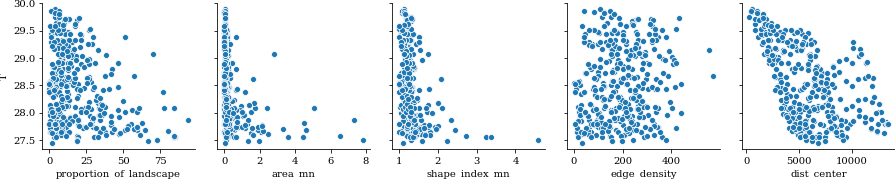

In [9]:
sns.pairplot(regr_df, x_vars=regr_df.columns.drop(y_col), y_vars=[y_col])

In [13]:
threshold = 2
w = weights.DistanceBand.from_array(np.array(zga.zones)[regr_df_nonna], threshold)

In [14]:
X = regr_df.drop(y_col, axis=1)
m = spreg.ML_Error(regr_df[y_col].values[:, None], X.values, w=w, name_y=y_col, name_x=list(X.columns))

In [15]:
print(m.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :           T                Number of Observations:         358
Mean dependent var  :     28.5176                Number of Variables   :           6
S.D. dependent var  :      0.6725                Degrees of Freedom    :         352
Pseudo R-squared    :      0.3569
Sigma-square ML     :       0.022                Log likelihood        :     130.026
S.E of regression   :       0.150                Akaike info criterion :    -248.053
                                                 Schwarz criterion     :    -224.769

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [ ]:
# regr_df = regr_df.drop('area_mn', axis=1)
# # X = regr_df.drop([y_col] + ['edge_density'], axis=1)
# X = regr_df.drop(y_col, axis=1)
# m = spreg.ML_Error(regr_df[y_col].values[:, None], X.values, w=w, name_y=y_col, name_x=list(X.columns))

# regr_df = regr_df.drop('edge_density', axis=1)
# # X = regr_df.drop([y_col] + ['edge_density'], axis=1)
# X = regr_df.drop(y_col, axis=1)
# m = spreg.ML_Error(regr_df[y_col].values[:, None], X.values, w=w, name_y=y_col, name_x=list(X.columns))

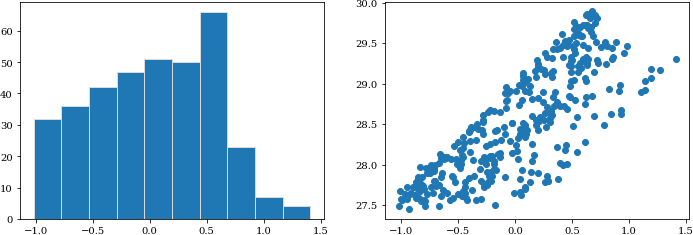

In [16]:
figwidth, figheight = plt.rcParams['figure.figsize']
fig, axes = plt.subplots(1, 2, figsize=(2 * figwidth, figheight))
axes[0].hist(m.y - m.predy)
axes[1].scatter(m.y - m.predy, m.y)      

## 4. Partial regression

In [30]:
comp_metrics = metrics[:1]
other_features = metrics[1:] + ['dist_center']

### 4.1 Using the a least squares regression

In [25]:
# corr_df = pd.DataFrame(index=['r', 'p'])
# for x_col in regr_df.drop(y_col, axis=1).columns:
#     corr_df[x_col] = pg.partial_corr(data=regr_df, y=y_col, x=x_col, covar=list(regr_df.drop([x_col, y_col], axis=1).columns))[['r', 'p-val']].values.flatten()
    
corr_df = pd.DataFrame(index=['r', 'p'])
for x_col in comp_metrics:
    corr_df[x_col] = pg.partial_corr(data=regr_df, y=y_col, x=x_col, covar=conf_metrics)[['r', 'p-val']].values.flatten()
for x_col in other_features:
    corr_df[x_col] = pg.partial_corr(data=regr_df, y=y_col, x=x_col, covar=comp_metrics)[['r', 'p-val']].values.flatten()

In [26]:
corr_df

,proportion_of_landscape,area_mn,shape_index_mn,edge_density,dist_center
r,-3.983646e-01,-0.129310,-0.177379,3.746362e-01,-5.936293e-01
p,4.583475e-15,0.014349,0.000748,2.260542e-13,1.833662e-35


### 4.2 Using the spatial regression

In [19]:
def get_spreg_ml_error_model(regr_df, y_col, w):
    X = regr_df.drop(y_col, axis=1)
    return spreg.ML_Error(regr_df[y_col].values[:, None],
                          X.values,
                          w=w,
                          name_y=y_col,
                          name_x=list(X.columns))

def get_partial_spreg_coeffs(regr_df, y_col, x_col, w, covar_col=None):
    # Based on https://gist.github.com/fabianp/9396204419c7b638d38f and
    # https://pingouin-stats.org/_modules/pingouin/correlation.html#partial_corr
    if isinstance(covar_col, str):
        covar_col = [covar_col]
    elif covar_col is None:
        covar_col = list(regr_df.columns.drop([y_col, x_col], errors='ignore'))
    # 1. perform a regression with x_col as target and covar as features
    m_x = get_spreg_ml_error_model(regr_df[covar_col + [x_col]], x_col, w)
    # 2. perform a regression with y_col as target and covar as features
    m_y = get_spreg_ml_error_model(regr_df[covar_col + [y_col]], y_col, w)
    # 3. return the correlation coefficient between the residuals of both
    # regressions
    return stats.pearsonr((m_x.y - m_x.predy).flatten(), (m_y.y - m_y.predy).flatten())

In [31]:
# corr_df = pd.DataFrame(index=['r', 'p'])

# for x_col in regr_df.drop(y_col, axis=1).columns:
#     corr_df[x_col] = get_partial_spreg_coeffs(regr_df, y_col, x_col, w)
corr_df = pd.DataFrame(index=['r', 'p'])

for x_col in comp_metrics:
    corr_df[x_col] = get_partial_spreg_coeffs(regr_df, y_col, x_col, w, covar_col=conf_metrics)
for x_col in other_features:
    corr_df[x_col] = get_partial_spreg_coeffs(regr_df, y_col, x_col, w, covar_col=comp_metrics)

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/scipy/optimize/_minimize.py:778: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


In [32]:
corr_df

,proportion_of_landscape,area_mn,shape_index_mn,edge_density,dist_center
r,-4.126989e-01,-0.113218,-0.160736,3.619957e-01,-5.551176e-01
p,3.720559e-16,0.032226,0.002285,1.589947e-12,2.513929e-30


## 5. Variance partitioning

In [20]:
def get_partial_explained_var(regr_df, y_col, feature_col, w):
    X = regr_df[feature_col]
    m = spreg.ML_Error(regr_df[y_col].values[:, None],
                       X.values,
                       w=w,
                       name_y=y_col,
                       name_x=feature_col)
    return m.pr2

In [21]:
groups = [
    ['proportion_of_landscape'],
    ['shape_index_mn']
]

all_features = [feature for group in groups for feature in group]
total_explained_var = get_partial_explained_var(regr_df, y_col, all_features, w)
group_explained_vars = [get_partial_explained_var(regr_df, y_col, group, w) for group in groups]
covs = np.linalg.solve(np.array([[1, 0, 1], [0, 1, 1], [1, 1, 1]]),
                       group_explained_vars + [total_explained_var])

In [30]:
covs

array([0.02535702, 0.02746524, 0.09036516])

In [90]:
corr_df

,proportion_of_landscape,shape_index_mn,dist_center
r,-3.299265e-01,-0.077047,-5.513871e-01
p,1.545916e-10,0.145708,7.295986e-30
